In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import os

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
path = r"C:\Users\siddh\Desktop\analytics\ECEN 689\Challenge4 Wine"
os.chdir(path)

In [3]:
## Read in files
df_train = pd.read_csv("winequality-combined-training.csv").drop(["Id"],axis = 1)
df_test = pd.read_csv("winequality-combined-testing.csv").drop(["Id"],axis = 1)

In [166]:
df_train.isnull().sum()
#df_test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [5]:
def pred_target(df,colname = "type"):
    X = df.drop([colname],axis = 1)
    Y = df[colname]
    return X,Y

In [6]:
X_train,Y_train = pred_target(df_train)
X_test = df_test

In [174]:
## Optimize the decision tree classifier with GridSearch Cross Validation
dtc = DecisionTreeClassifier(random_state=14)

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best'],
                  'max_depth': [3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100,None],
                  'max_features': ["sqrt","log2",2,4,6,8,9,10,11],
                 'min_samples_split': [2,3,4,5,7,10],'min_samples_leaf': [1,2,4,5,7,9,10]}

cross_validation = StratifiedKFold(n_splits=10,random_state=14)

grid_search = GridSearchCV(dtc, param_grid=parameter_grid,n_jobs=-1)

grid_search.fit(X_train,Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_param = grid_search.best_estimator_



Best score: 0.9880321757896802
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}


In [169]:
dtc1 = DecisionTreeClassifier(criterion='gini',max_depth=8,max_features=6,splitter ='best',
                              min_samples_leaf= 1, min_samples_split =  7)

In [170]:
## Fit the best decision tree and save the results
dtc1.fit(X_train,Y_train)
prediction2 = dtc1.predict(X_test)
prediction_df1 = pd.DataFrame(prediction2,columns=['type'])
prediction_df1.to_csv("prediction_dt.csv")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
## Fit random forest
rfc = RandomForestClassifier(bootstrap = True,n_estimators = 150)
rfc.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
feature_importances_df = pd.DataFrame(rfc.feature_importances_,index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [10]:
feature_importances_df

,importance
total sulfur dioxide,0.326683
chlorides,0.282084
volatile acidity,0.106767
free sulfur dioxide,0.057475
density,0.054987
sulphates,0.052503
residual sugar,0.036229
fixed acidity,0.035913
citric acid,0.019524
pH,0.019020


In [11]:
rfc_prediction = rfc.predict(X_test)
prediction_df2 = pd.DataFrame(rfc_prediction,columns=['type'])
prediction_df2.to_csv("randomforest_prediction2.csv")

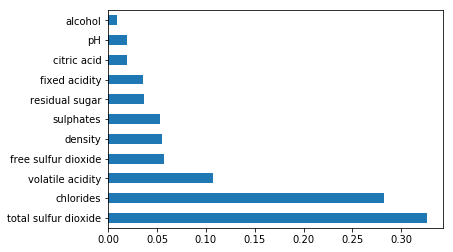

In [21]:
%matplotlib inline
feat_importances = pd.Series(rfc.feature_importances_, index=X_test.columns)
feat_importances.nlargest(20).plot(kind='barh')